In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"D:\Intermediate_task\clustering\iris.csv")

In [3]:
X = df.drop("species", axis=1)

Standarize data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Elbow method:how close data points are to the cluster center; lower inertis=better cluster fit

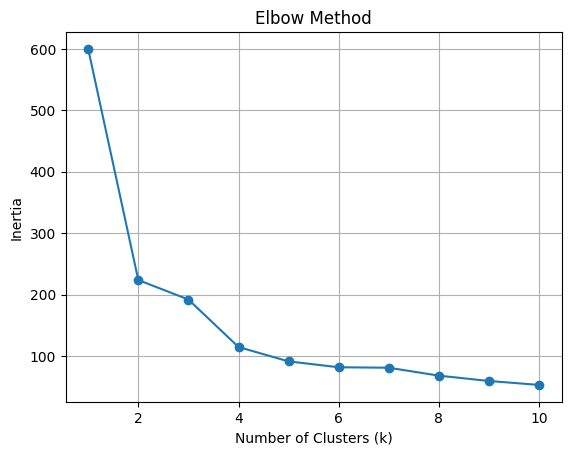

In [5]:
inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

Train

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df["cluster"] = kmeans.labels_

principal component analysis :redueces 4 featires to 2. 2d plotting.

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]

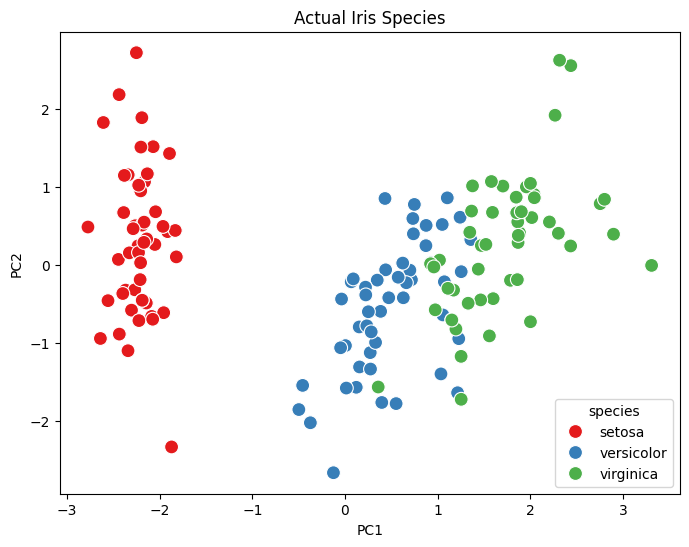

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="species", palette="Set1", s=100)
plt.title("Actual Iris Species")
plt.show()